# Inaugural Project

See Read.me for additional information.

# Table of Contents

## Question 1
## Question 2
## Question 3
## Question 4
## Question 5

In [1]:
%load_ext autoreload
%autoreload 2

## Question 1

For the following exercise, we will assume that the choice set for the model is discrete in half hours. Specificially, this means that

$$L_M, L_F, H_M, H_F \in [ \frac{0\cdot24}{48}, \frac{1\cdot24}{48}, ..., \frac{48\cdot24}{48}] $$

Running the code below, yields a figure illustrating how $\frac{H_F}{H_M}$ changes when varying $\alpha \in {0.25, 0.50, 0.75}$ and $\sigma = {0.5, 1.0, 1.5}$. 

Intuitively, this is an investigation of how the ratio of hours worked at home-production for female members relative to male mebers of the household is affected by the productivity in home production for female mebers relative to male members of the household, $\alpha$, and $\sigma$ is the elasticity of substition.

A description of the results is given below the plots.

This is the procedure of the code below:

- We import the packages we need to later illustrate the results in a plot, and also import our HouseholdSpecializationModelClass from a module.
- We create an instance of the model class, which we call model
- Create a list of values for alpha we want to solve the model for
- The first loop is for solving the model for different values of $\alpha$, while holding $\sigma$ fixed at 1.0. The value is then plotted in a scatterplot
- Create a list of values for $\sigma$ we want to solve the model for
- The second loop is for solving the model for different values of $\sigma$, while holding $\alpha$ fixed at 0.5.
- At the end we call the two plots that we just generated by looping.

C:\Users\user\Desktop\Kandidat 1. semester\Introduction to Programming\projects-2023-de-slemme-programmeringsrotter\inauguralproject\Rotterne.py:59: RuntimeWarning: divide by zero encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))


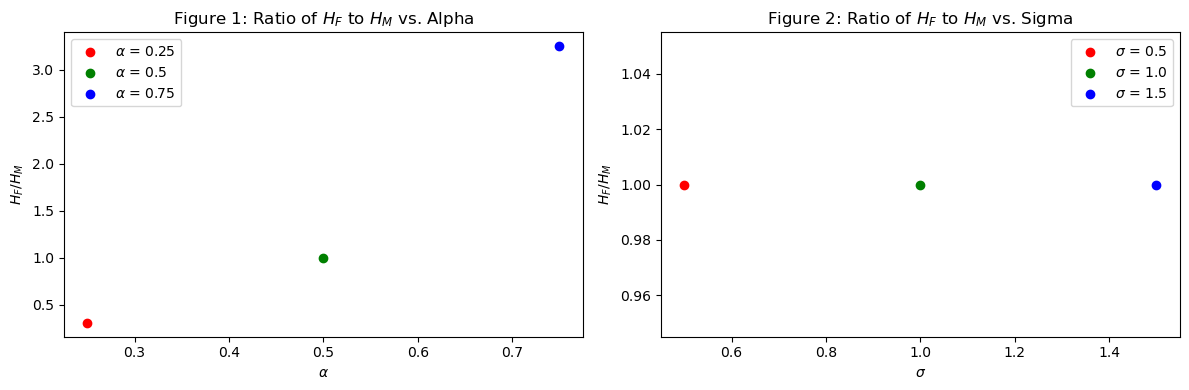

In [2]:
import matplotlib.pyplot as plt
from Rotterne import HouseholdSpecializationModelClass

# create an instance of the model class
model = HouseholdSpecializationModelClass()

# plot H_F/H_M vs alpha
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

ax = axs[0]
alphas = [0.25, 0.5, 0.75] #Create a list of values for alpha we want to solve the model for
colors = ['red', 'green', 'blue']

#First loop
for i, alpha in enumerate(alphas):
    model.par.alpha = alpha
    model.par.sigma = 1.0
    opt = model.solve_discrete()
    ax.scatter(alpha, opt.HF/opt.HM, label=r'$\alpha$ = {}'.format(alpha), color=colors[i])

ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$H_F / H_M$')
ax.set_title('Figure 1: Ratio of $H_F$ to $H_M$ vs. Alpha')
ax.legend()

# plot H_F/H_M vs sigma
ax = axs[1]
sigmas = [0.5, 1.0, 1.5]
colors = ['red', 'green', 'blue']


#Second loop
for i, sigma in enumerate(sigmas):
    model.par.sigma = sigma
    model.par.alpha = 0.5
    opt = model.solve_discrete()
    ax.scatter(sigma, opt.HF/opt.HM, label=r'$\sigma$ = {}'.format(sigma), color=colors[i])

ax.set_xlabel(r'$\sigma$')
ax.set_ylabel(r'$H_F / H_M$')
ax.set_title('Figure 2: Ratio of $H_F$ to $H_M$ vs. Sigma')
ax.legend()

# display the plots
plt.tight_layout()
plt.show()

**figure 1** shows that when increasing the relative productivity of female members of the households relative to male memebers, $\alpha\uparrow$, we see that the ratio $\frac{H_F}{H_M}$ increses. So hours spent working at home for female memebers relative to male memebrs is increasing in their relative productivity.

**Figure 2** shows that the ratio of female hours working at home relative to male hours, $\frac{H_F}{H_M}$, is, ceteris paribus, independent of the elasticity of substitution. This is because $\sigma$ monitors the response in $\frac{H_F}{H_M}$ from changes in $\alpha$, but as $\alpha$ is held fixed in this instance, we see no changes in household behaviour from changes in $\sigma$.





# Opgave 2

In the following exercise, we continue with our assumption of a discrete choice set in half hours, and now move to plotting $log(\frac{H_F}{H_M})$ against $log(\frac{w_F}{w_M})$ for different values of $w_F$.

Overview of what the code below does:
- Import libraries and HouseholdsSpecializationModelClass from the module
- Create an instance of the HouseholdSpecializationModelClass and set default parameters for alpha and sigma
- Initialize empty lists for storing H_F/H_M and log(w_F/w_M)
- Loop through the w_F values provided in model.par.wF_vec and solve the model for each value, appending the results to the lists.
- Create scatter plot
- Display the plot with appropriate labels and legend-

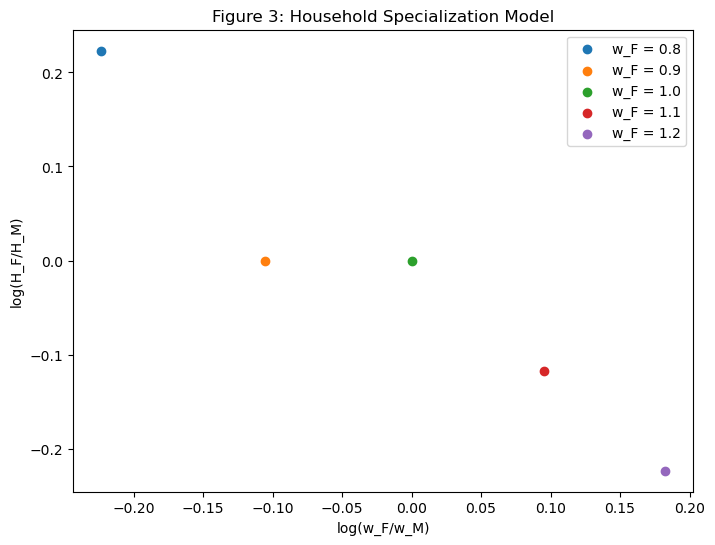

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from Rotterne import HouseholdSpecializationModelClass

# create an instance of the model class
model = HouseholdSpecializationModelClass()

# solve the model for the default parameters
model.par.alpha = 0.5
model.par.sigma = 1.0
opt = model.solve_discrete()

# specify w_F values directly in the main script
wF_values = np.array([0.8, 0.9, 1.0, 1.1, 1.2])

# create lists to store data for each value of w_F
HF_HM_list = []
log_wf_wm_list = []

# solve the model for each value of w_F
for w_F in wF_values:
    model.par.wF = w_F
    opt = model.solve_discrete()
    HF_HM_list.append(opt.HF/opt.HM)
    log_wf_wm_list.append(np.log(w_F/model.par.wM))

# create the plot
fig, ax = plt.subplots(figsize=(8,6))

for i in range(len(HF_HM_list)):
    ax.scatter(log_wf_wm_list[i], np.log(HF_HM_list[i]), label=f"w_F = {wF_values[i]:.1f}")

ax.set_xlabel("log(w_F/w_M)")
ax.set_ylabel("log(H_F/H_M)")
ax.set_title("Ratio of H_F to H_M vs. Ratio of W_F to W_M")
ax.legend()

ax.set_title('Figure 3: Household Specialization Model')
plt.show()

**Figure 3** shows that the ratio $\frac{H_F}{H_M}$ generally is decreasing in $\frac{w_F}{w_M}$. When w_F increases, we see $H_F/H_M$ decreasing, which is due to females substituting towards working production, as it has relative comparative advantages for the couple. Though, we see that for $w_F= 1.0$ and $w_F =0.9$ there is no visible difference in the plot. This is against our expectation, and we expect this to be resolved when we turn to continous choice set.

A possible solution to discrete version would be to increase the grid points in our solve_discrete function in the module to have a finer grid, and allow for a more accurate decision. Though this would be computational more expensive.

## Question 3

We now assume that the choice set is continous. This is equivalent to increase the possible choice set, which in question 1 and 2 were limited to half hours. We are now modelling infinitely many choice possibilites. Based on this, we expect the kink from figure 3 to disappear.

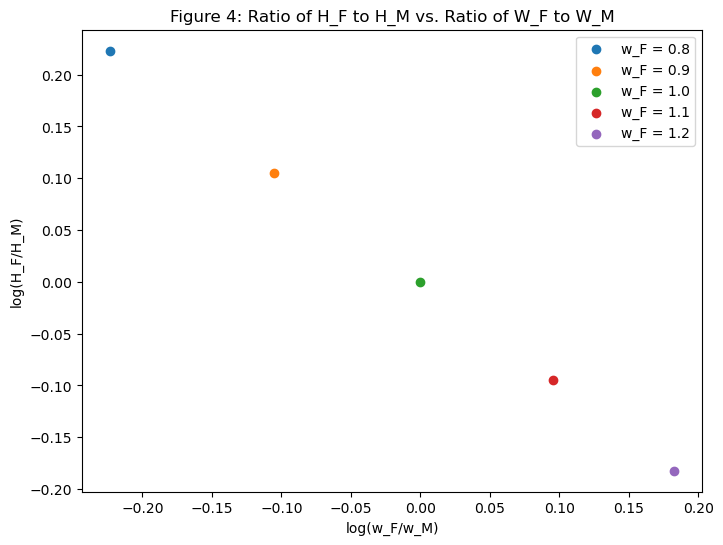

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from Rotterne import HouseholdSpecializationModelClass

# create an instance of the model class
model = HouseholdSpecializationModelClass()

# create lists to store data for each value of w_F
HF_HM_list = []
log_wf_wm_list = []

#Create the list of the values wF we want to go through
wF_vec = np.linspace(0.8,1.2,5) #This adds the wF_vec

# solve the model for each value of w_F
for i, w_F in enumerate(wF_vec):
    model.par.wF = w_F
    opt = model.solve()
    
    if opt is not None:
        model.sol.LM_vec[i], model.sol.HM_vec[i], model.sol.LF_vec[i], model.sol.HF_vec[i] = opt.LM, opt.HM, opt.LF, opt.HF
        HF_HM_list.append(opt.HF / opt.HM)
        log_wf_wm_list.append(np.log(w_F / model.par.wM))
    else:
        print(f"Optimization failed for w_F = {w_F}")
        
# create the plot
fig, ax = plt.subplots(figsize=(8, 6))

for i in range(len(HF_HM_list)):
    ax.scatter(log_wf_wm_list[i], np.log(HF_HM_list[i]), label=f"w_F = {wF_vec[i]:.1f}")

ax.set_xlabel("log(w_F/w_M)")
ax.set_ylabel("log(H_F/H_M)")
ax.set_title("Figure 4: Ratio of H_F to H_M vs. Ratio of W_F to W_M")
ax.legend()

plt.show()

**Figure 4** reveals that the negative relationship between $\frac{wF}{wM}$ and $\frac{H_F}{H_M}$ is now more clear, as the infinit choice set allows for a precise solution, which  reveals a more smooth linear relationship

Imports and set magics:

# Exercise 4



In this exercise we will initially choose $\alpha$ and $\sigma$ that minimize the sum of squared errors. Next, we will in figure 5 (see below) illustrate how well the model fit the data.


The code is to estimate $\alpha$ and  $\sigma$. The code defines an objective function obje(x) that takes two parameters alpha and sigma, sets them in the model object, solves and runs regression, and returns the squared difference between beta0_target and beta0 and beta1_target and beta1, where the targets are given from the exercise. Then, using scipy.optimize.minimize(), it finds the minimum of obje() with bounds and initial guess provided, and prints the result.

In [5]:
from scipy import optimize

def obje(x):
    model.par.alpha=x[0]
    model.par.sigma=x[1]
    model.solve_wF_vec()
    model.run_regression()
    return (model.par.beta0_target - model.sol.beta0)**2 + (model.par.beta1_target - model.sol.beta1)**2

bounds = [(0.5,0.99),(0.01, 0.3)]
initial_guess = [0.8, 0.1]
#initial guess og bounds er vigtige. Bounds fra en 0.5 til 0.9
res = optimize.minimize(obje, initial_guess, method='Nelder-Mead', bounds=bounds, tol = 0.000000001) #Hvis tolerancen er høj, accepterer den løsninger som kun er tæt på at være rigtige

print(res)

 final_simplex: (array([[0.9820106 , 0.10000394],
       [0.9820106 , 0.10000394],
       [0.9820106 , 0.10000394]]), array([2.95723565e-16, 3.57448681e-15, 1.64237294e-14]))
           fun: 2.9572356546436795e-16
       message: 'Optimization terminated successfully.'
          nfev: 127
           nit: 58
        status: 0
       success: True
             x: array([0.9820106 , 0.10000394])


**Resulting estimates** $(\hat\alpha, \hat\sigma) = (0.98, 0.19)$

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

model = HouseholdSpecializationModelClass()


alpha_vals = np.linspace(0.5, 0.9, 10)  # define range of alpha values to test
sigma_vals = np.linspace(0.1, 0.3, 10)  # define range of sigma values to test

errors = np.zeros((len(alpha_vals), len(sigma_vals)))  # initialize array to hold errors

for i, alpha in enumerate(alpha_vals):
    for j, sigma in enumerate(sigma_vals):
        model.par.alpha = alpha
        model.par.sigma = sigma
        model.solve_wF_vec(discrete=False)
        model.run_regression()
        errors[i,j] = (model.par.beta0_target - model.sol.beta0)**2 + (model.par.beta1_target - model.sol.beta1)**2

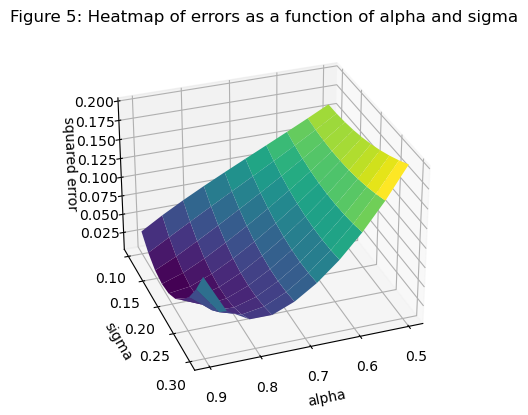

In [7]:
# create 3D plot of squared errors as a function of alpha and sigma
alpha_mesh, sigma_mesh = np.meshgrid(alpha_vals, sigma_vals, indexing='ij')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(alpha_mesh, sigma_mesh, errors, cmap='viridis')
ax.set_xlabel('alpha')
ax.set_ylabel('sigma')
ax.set_zlabel('squared error')
ax.set_title("Figure 5: Heatmap of errors as a function of alpha and sigma")

ax.view_init(elev=30, azim=70)  # adjust view angle
plt.show()

**Figure 5** is in accordance with out estimates of $(\hat\alpha, \hat\sigma) = (0.98, 0.19)$, as the figure indicates this is actually the minimum squared error.

In [8]:
print("Minimum squared error:", res.fun)


Minimum squared error: 2.9572356546436795e-16


# Question 5

For this exercise, we will assume that $\alpha$=0.5, which is in accordance with empirical evidence.

Our "extention" does not include a real feature or extra mechanisms, but is rather a modification of the exisitng model class. Our extentded version modifies the hours available in a day for the members in the household, such  that they now have 18 hours. This can be interpreted, as they have 18 active hours in a day, and all the hours spent on home production is now seperated from sleeping. 

The modified version is produced as a new class in our model, under the class name: HouseholdSpecializationModelClassExtended:


Checking estimates

In [9]:
from Rotterne import HouseholdSpecializationModelClassExtended

from scipy import optimize

modelext = HouseholdSpecializationModelClassExtended()


def obje(x):
    modelext.par.alpha=x[0]
    modelext.par.sigma=x[1]
    modelext.solve_wF_vec()
    modelext.run_regression()
    return (modelext.par.beta0_target - modelext.sol.beta0)**2 + (modelext.par.beta1_target - modelext.sol.beta1)**2

bounds = [(0.5,0.99),(0.01, 0.3)]
initial_guess = [0.8, 0.1]
#initial guess og bounds er vigtige. Bounds fra en 0.5 til 0.9
resext = optimize.minimize(obje, initial_guess, method='Nelder-Mead', bounds=bounds, tol = 0.000000001)

print(resext)

 final_simplex: (array([[0.98202235, 0.09998677],
       [0.98202235, 0.09998678],
       [0.98202235, 0.09998677]]), array([7.81314980e-16, 1.06184906e-15, 5.45001344e-15]))
           fun: 7.813149800407115e-16
       message: 'Optimization terminated successfully.'
          nfev: 141
           nit: 66
        status: 0
       success: True
             x: array([0.98202235, 0.09998677])


In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

modelext = HouseholdSpecializationModelClassExtended()


#alpha_vals = np.linspace(0.5, 0.9, 10)  # define range of alpha values to test
sigma_vals = np.linspace(0.1, 0.3, 10)  # define range of sigma values to test

errors = np.zeros((len(alpha_vals), len(sigma_vals)))  # initialize array to hold errors

for i, alpha in enumerate(alpha_vals):
    for j, sigma in enumerate(sigma_vals):
        modelext.par.alpha = 0.5
        modelext.par.sigma = sigma
        modelext.solve_wF_vec(discrete=False)
        modelext.run_regression()
        errors[i,j] = (modelext.par.beta0_target - modelext.sol.beta0)**2 + (modelext.par.beta1_target - modelext.sol.beta1)**2

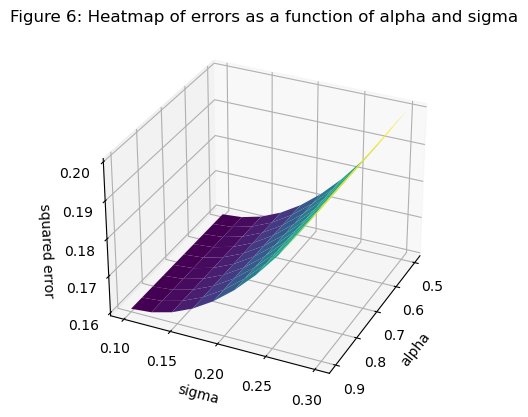

In [11]:
# create 3D plot of squared errors as a function of alpha and sigma
alpha_mesh, sigma_mesh = np.meshgrid(alpha_vals, sigma_vals, indexing='ij')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(alpha_mesh, sigma_mesh, errors, cmap='viridis')
ax.set_xlabel('alpha')
ax.set_ylabel('sigma')
ax.set_zlabel('squared error')
ax.set_title("Figure 6: Heatmap of errors as a function of alpha and sigma")

ax.view_init(elev=30, azim=25)  # adjust view angle
plt.show()

**Figure 6** reveals that, now that we are holding $\alpha$ fixed at 0.5, the surface in the figure does not change along the axis representative to alpha. THis is because, the figure actually is misleading, because alpha actually is never changing in this version of the model. We see that error in figure 6 > error in figure 5 Indicating that our extention, together with constant $\alpha$.-
